<a href="https://colab.research.google.com/github/gomlfx/apiaryfund/blob/master/kats_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade pip
!pip install kats

     |████████████████████████████████| 1.6MB 7.2MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 6.3 MB 8.0 MB/s 
     |████████████████████████████████| 815 kB 43.1 MB/s 
     |████████████████████████████████| 64 kB 2.1 MB/s 
     |████████████████████████████████| 498 kB 53.1 MB/s 
     |████████████████████████████████| 3.4 MB 38.2 MB/s 
     |████████████████████████████████| 20.6 MB 1.3 MB/s 
     |████████████████████████████████| 9.5 MB 41.2 MB/s 
     |████████████████████████████████| 25.3 MB 75 kB/s 
     |████████████████████████████████| 475 kB 59.8 MB/s 
  Created wheel for kats: filename=kats-0.1.0-py3-none-any.whl size=286608 sha256=391741d582e4740747c1ee210e585d7cd88032657edbd9a820d475167499efa7
  Stored in directory: /root/.cache/pip/wheels/c8/dd/5b/cc7cb7fc37c5b838c65e504437bba4c1828a3fbb473c0c11be
  Created wheel for fbprophet: filename=fbprophet-0.7-py3-no

In [2]:
# !pip install auto-ts

     |████████████████████████████████| 90 kB 4.4 MB/s 
     |████████████████████████████████| 22.3 MB 27 kB/s 
     |████████████████████████████████| 1.5 MB 34.9 MB/s 
     |████████████████████████████████| 973 kB 45.4 MB/s 
     |████████████████████████████████| 115 kB 72.9 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: dask
    Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0


In [3]:
#import libraries
import pandas as pd
import numpy as np 
from datetime import datetime, timedelta
import sys
import matplotlib.pyplot as plt
import warnings
from kats.consts import TimeSeriesData #already has lstm, and maybe all models
from auto_ts import auto_timeseries #another auto ensembler

Imported auto_timeseries version:0.0.36. Call by using:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [4]:
import sys
sys.modules.keys()

dict_keys(['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'warnings', 're', 'enum', 'types', '_collections', 'sre_compile', '_sre', 'sre_parse', 'sre_constants', 'functools', '_functools', 'collections', '_collections_abc', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', 'copyreg', 'site', 'os', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_sitebuiltins', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'google', 'google.cloud', 'google.logging', 'mpl_toolkits', 'sphinxcontrib', 'sitecustomize', 'runpy', 'pkgutil', 'weakref', '_weakrefset', 'ipykernel', 'ipykernel._version', 'ipykernel

In [5]:
warnings.simplefilter(action='ignore')
sys.path.append("../")

In [6]:
#import data file
header = ["date","time","value"]
df = pd.read_csv("EURUSD1440.csv", usecols=range(0,3), names=header)

In [7]:
#check data file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12702 entries, 0 to 12701
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    12702 non-null  object 
 1   time    12702 non-null  object 
 2   value   12702 non-null  float64
dtypes: float64(1), object(2)
memory usage: 297.8+ KB


In [8]:
df.head()

,date,time,value
0,1971.01.04,00:00,0.5369
1,1971.01.05,00:00,0.5366
2,1971.01.06,00:00,0.5365
3,1971.01.07,00:00,0.5368
4,1971.01.08,00:00,0.5371


In [9]:
#pd.to_datetime
df["time"] = pd.to_datetime(df['date']+' '+df['time'])
df_df = df[["time","value"]]
df_df = df_df.tail(100)

In [10]:
#show pd.datetime applied
df_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 12602 to 12701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    100 non-null    datetime64[ns]
 1   value   100 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [11]:
df.tail()

,date,time,value
12697,2021.06.30,2021-06-30,1.18968
12698,2021.07.01,2021-07-01,1.18547
12699,2021.07.02,2021-07-02,1.18488
12700,2021.07.05,2021-07-05,1.18590
12701,2021.07.06,2021-07-06,1.18597


In [12]:
#construct TimeSeriesData object for each time series
df_ts = TimeSeriesData(df_df)
print(type(df_ts.time))
print(type(df_ts.value))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


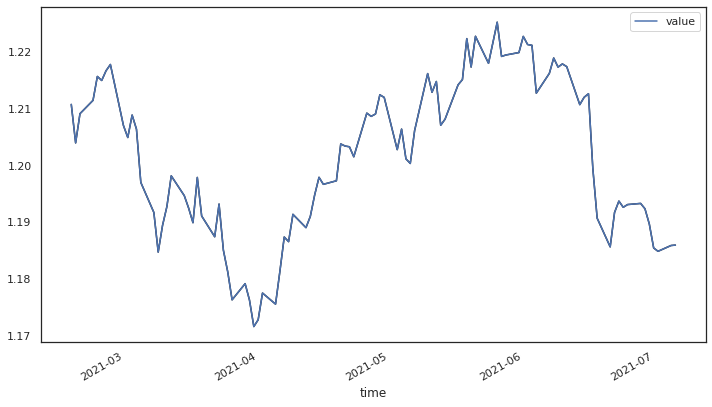

In [14]:
#plot current data
%matplotlib inline
#Must pass the name of the value columns to plot
df_ts.plot(cols=['value'])
plt.show()

In [ ]:
#examples below in case needed in the future

In [15]:
#convert to pandas.DataFrame 
df_ts.to_dataframe().tail()

,time,value
95,2021-06-30,1.18968
96,2021-07-01,1.18547
97,2021-07-02,1.18488
98,2021-07-05,1.18590
99,2021-07-06,1.18597


In [16]:
#convert to numpy.ndarray
df_ts.to_array()[0:5]

array([[Timestamp('2021-02-17 00:00:00'), 1.21071],
       [Timestamp('2021-02-18 00:00:00'), 1.20394],
       [Timestamp('2021-02-19 00:00:00'), 1.20908],
       [Timestamp('2021-02-22 00:00:00'), 1.2114200000000002],
       [Timestamp('2021-02-23 00:00:00'), 1.21563]], dtype=object)

In [17]:
df_ts.is_empty()

False

In [18]:
df_ts.is_univariate()

True

In [ ]:
#end examples

In [ ]:
#forecast: Kats follows the sklearn API pattern.

In [20]:
#import the param and model classes for Prophet, then LSTM model.
from kats.models.prophet import ProphetModel, ProphetParams
from kats.models.lstm import LSTMForecast, LSTMParams, LSTMModel

# params = ProphetParams(seasonality_mode='multiplicative')
# m = ProphetModel(eurusd15_ts, params)
# m.fit()
# fcst = m.predict(steps=24)
#create a model param instance
params = LSTMParams(hidden_size=125,time_window=25,num_epochs=250) #hidden,time_window,epoch
#create a prophet model instance
m=LSTMModel(df_ts, params) 
#fit model simply by calling m.fit()
m.fit() 
#make prediction for next 0-24GMT (96 M15 periods)
fcst = m.predict(steps=24)

In [21]:

fcst.head(100)

,time,fcst,fcst_lower,fcst_upper
0,2021-07-07,1.184067,1.124864,1.243271
1,2021-07-08,1.185195,1.125936,1.244455
2,2021-07-09,1.187904,1.128509,1.247299
3,2021-07-12,1.189508,1.130033,1.248984
4,2021-07-13,1.191079,1.131525,1.250633
5,2021-07-14,1.192925,1.133279,1.252572
6,2021-07-15,1.194686,1.134952,1.254420
7,2021-07-16,1.196675,1.136841,1.256508
8,2021-07-19,1.198686,1.138752,1.258621
9,2021-07-20,1.201065,1.141012,1.261119


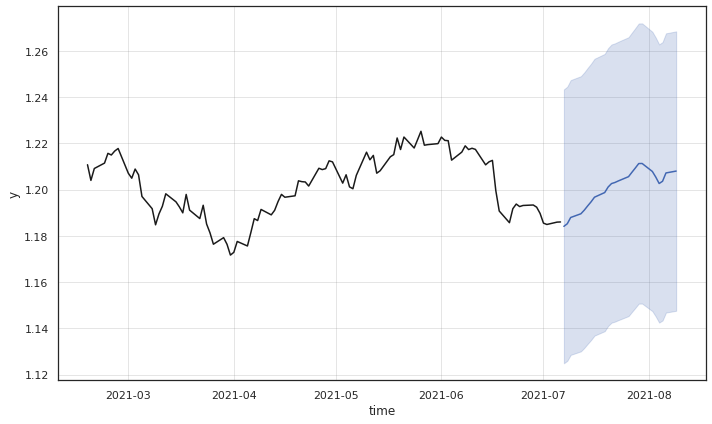

In [22]:
m.plot()
# pd.plotting.register_matplotlib_converters()
# %matplotlib inline

# fig = m.plot()
# plt.xlim('2021-01-05 00:00:00','2021-12-06 12:00:00')
# plt.ylim(1.16,1.23)

In [ ]:
# #try CUSUM
# import numpy as np

# from kats.consts import TimeSeriesData
# from kats.detectors.cusum_detection import CUSUMDetector

# #changepoints
# change_points = CUSUMDetector(eurusd15_ts).detector()
# change_points.plot()
 

In [ ]:
#do the below after ensemble

In [ ]:
# #preprocessing complete, start model
# from kats.consts import TimeSeriesData
# eurusd15_ts = TimeSeriesData(eurusd15_df)

In [ ]:
# #GetMetaData
# from kats.models.metalearner.get_metadata import GetMetaData
# MD = GetMetaData(data = eurusd15_ts)